<p>
<h1><b><center></center></b></h1>
<center><img src="https://drive.google.com/uc?id=1UJc1ci41G6ahJ7ProKvunUOIBcTXZ6ZG" align="center" width="550"></center>
</p>
<h1><b><center>Relatividad y Gravitación</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Problem Set 10</center></b><h2>
<h3><b><center>La ecuación de campo</center></b><h3>
<h5><center><b>Asignada</b>: Jueves 30  de enero de 2025</center><h5>
<h5><center><b>Entrega</b>: Jueves 6 de febrero de 2025</center><h5>
<small><center><i>Última actualización del profesor</i>: Domingo 2 de febrero de 2025, 8:00</center></small>

**NOTA**: Al inicio de la solución entregada debe incluir una relación de los puntos y los literales que resolvió completamente.

A continuación se presentan un conjunto de ejercicios o problemas para resolver usando la teoría vista en las últimas lecciones del curso. Resuelva los ejercicios *a mano* y suba una versión digitalizada en el espacio del ítem respectivo en Google Classroom.

**NOTA**: Los ejercicios marcados como **[Numérico]** deben resolverse exclusivamente usando las herramientas numéricas vistas en el curso, incluso si tienen una solución que puede obtenerse de forma enteramente analítica. El objetivo es que se aprendan a utilizar esas herramientas.

# **Solved $\checkmark\checkmark$**

1. **Identidades de Bianchi**. Consulte la demostración de la segunda identidad de Bianchi:

   $$
   R^\alpha{ }_{\beta[\mu \nu ; \sigma]}=0
   $$
   Indique claramente sus fuentes y en caso de usar inteligencias artificiales, cite claramente los *promps* utilizados en la consulta.


**[1]** Preambulo Matemático de la Relatividad General. Prof. Nelson Vanegas (2025)

**[2]** Geometry, Topology and Physics, 2nd Edition. Nakahara, M. (2003)

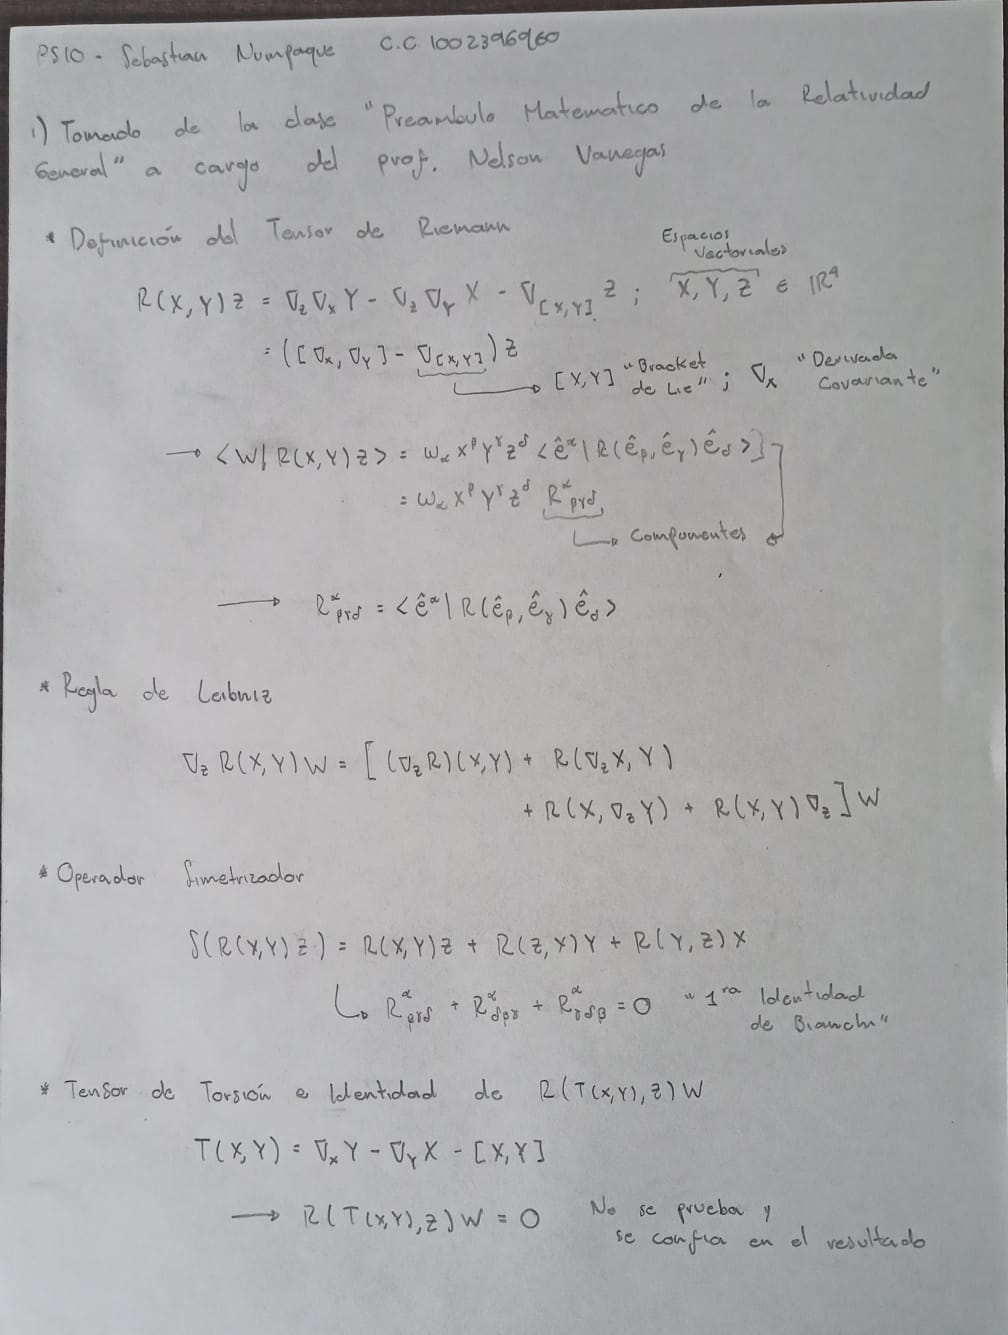

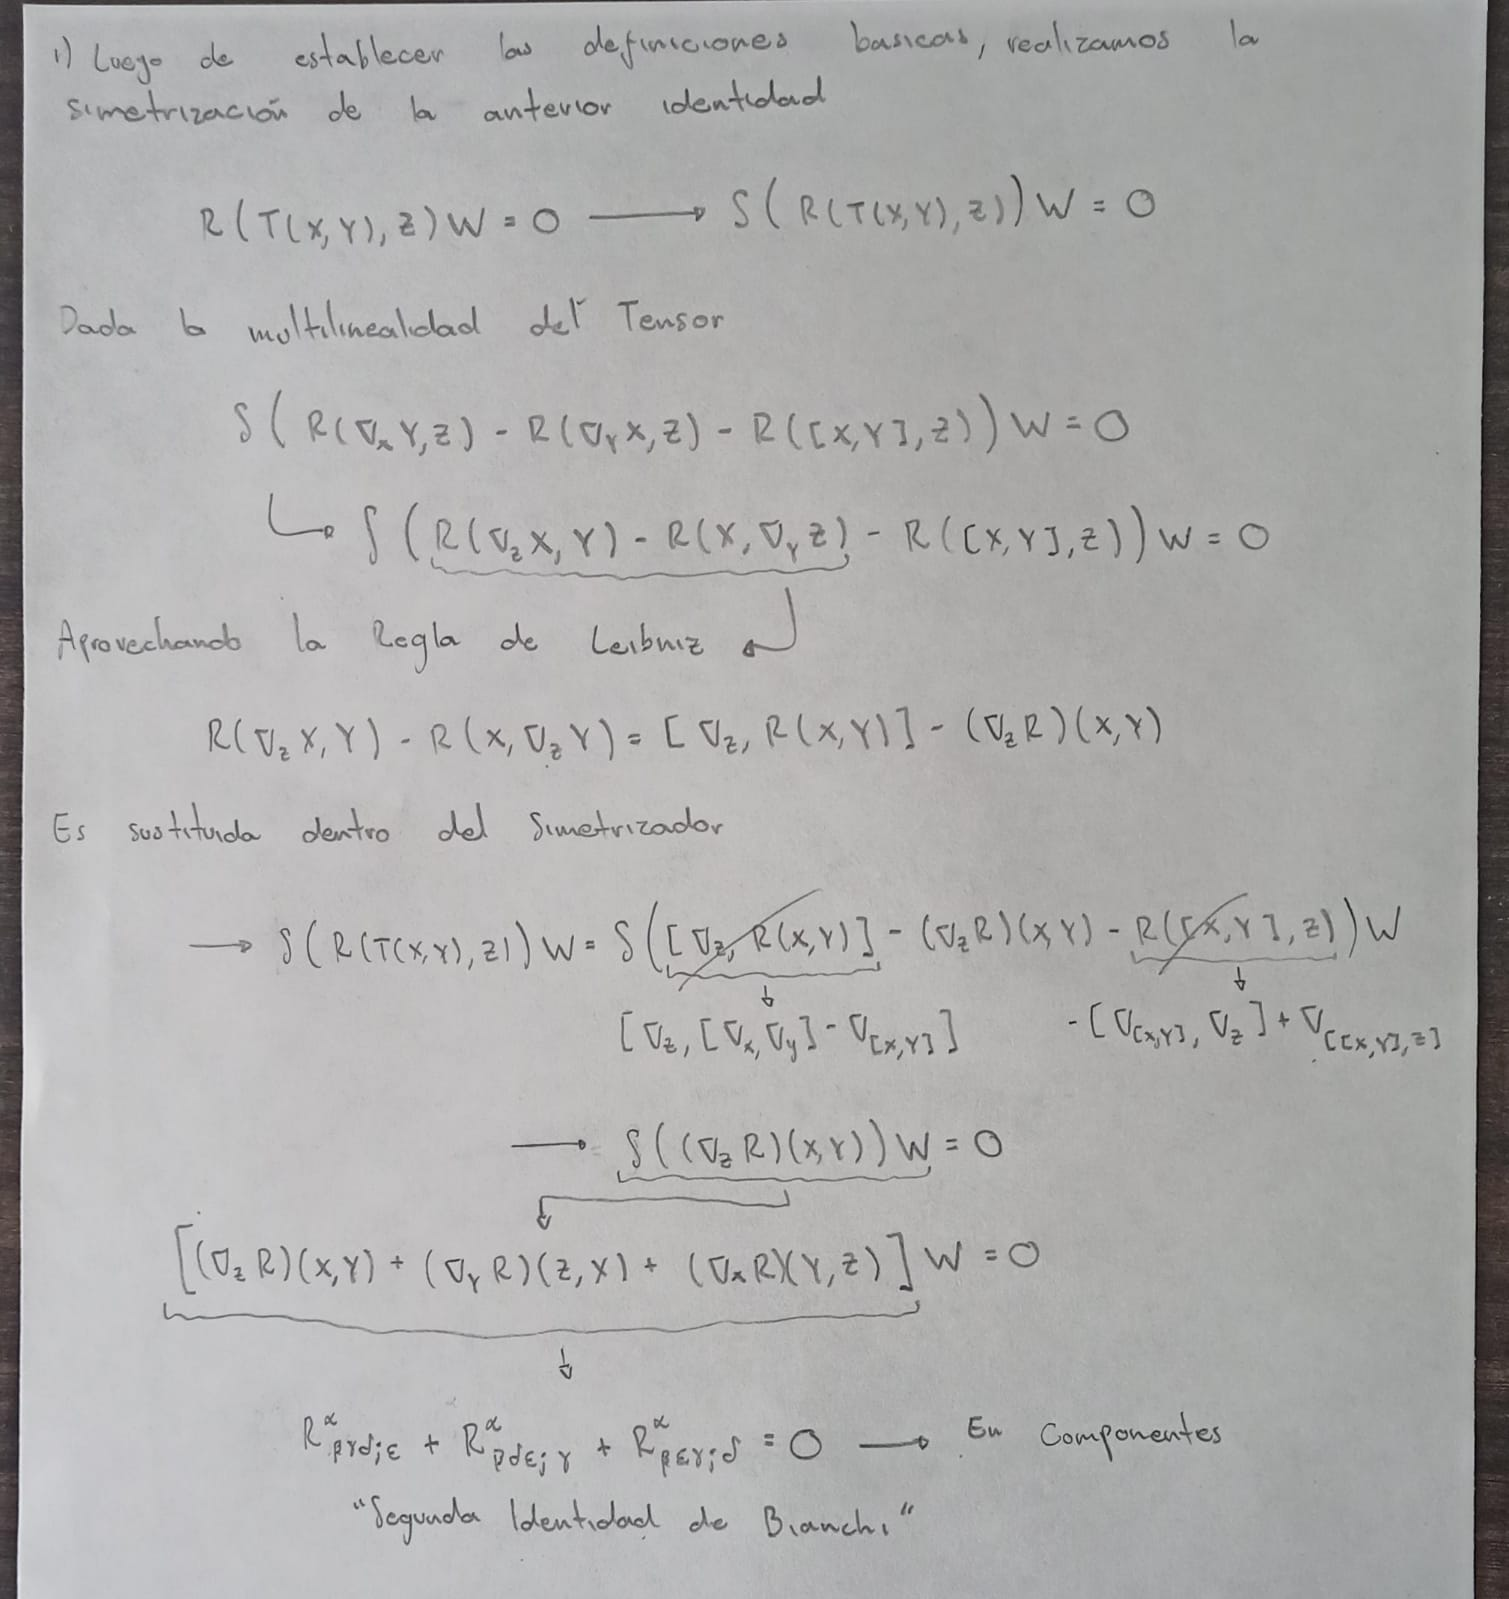

# **Solved $\checkmark\checkmark$**

2. **Forma alternativa y escalar de la ecuación de Einstein**. Partiendo de la ecuación de campo métrico de Einstein:
  $$
  G_{\mu\nu}=kT_{\mu\nu}
  $$
  donde $k=8\pi G/c^4$ ($G$ es aquí la constante de Cavendish y no debe confundirse con la traza del tensor de Einstein).
  
  1. demuestre que esta ecuación se puede también escribir de forma alternativa como:

    $$
    R_{\mu\nu}=k\left(T_{\mu\nu}-\frac{1}{2}g_{\mu\nu}T\right)
    $$

    Además, partiendo de la ecuación anterior, muestre que los escalares de Ricci y la traza del tensor de energía-momentum se relacionan como:

   $$
   R = -kT
   $$
  
  2. Muestre que, en la aproximación de campo débil, cuando la métrica tiende a ser la métrica de Newton y las velocidades de las partículas son mucho menores que la velocidad de la luz, las ecuaciones de campo métrico se reducen a la única ecuación:

     $$
     \nabla^2\phi \approx 4\pi G \rho
     $$

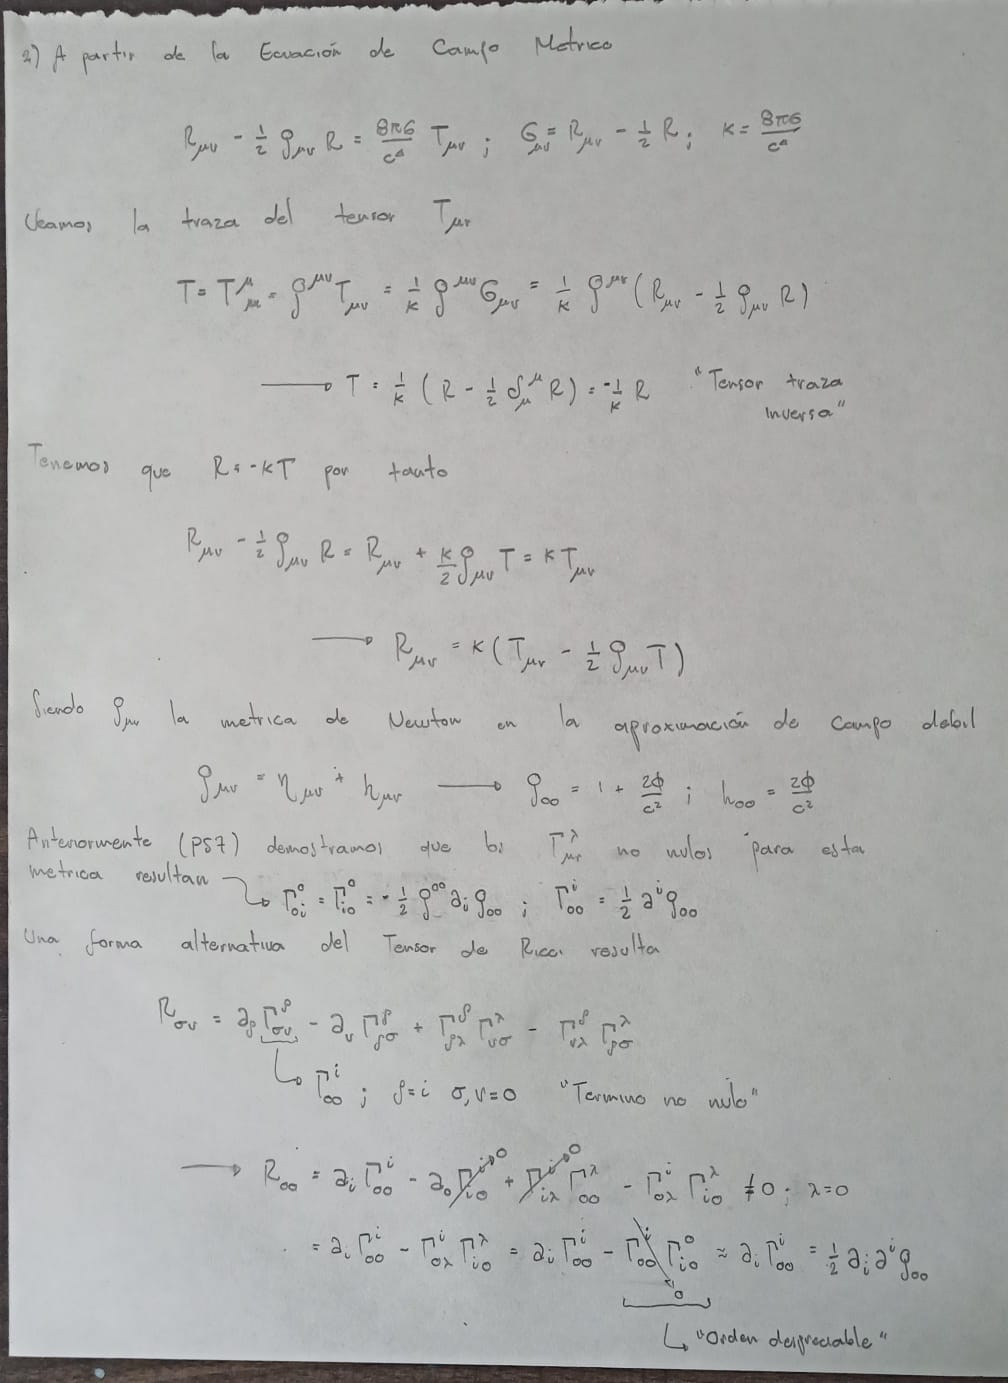

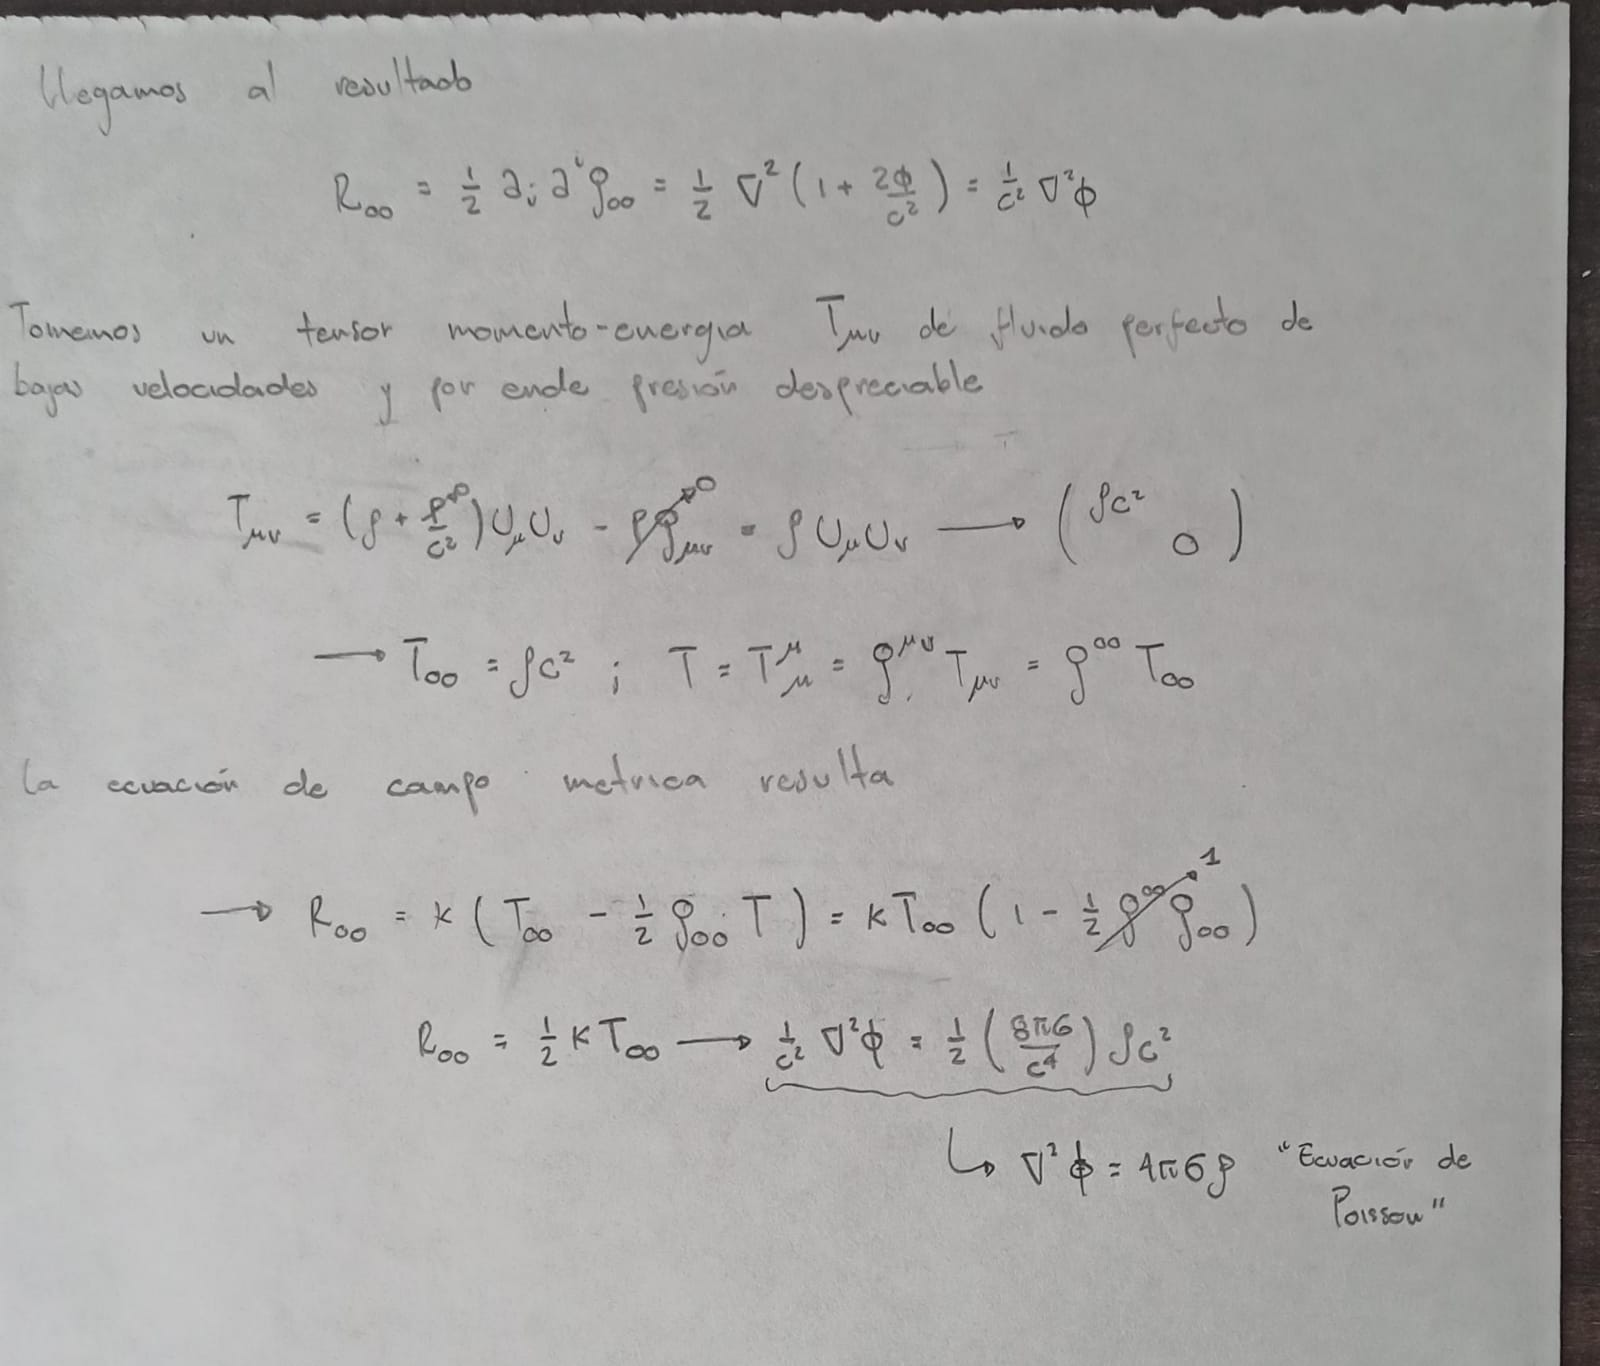

# **Solved $\checkmark\checkmark$**

3. **Ecuaciones de Friedmann-Lemaitre para un universo espacialmente plano**. La métrica *más simple* que se puede construir para un fluído uniforme e isotrópico que se extiende infinitamente por el espacio tiene la forma:

   $$
   d s^2 = c^2 d t^2 - a(t)^2\left(d r^2 + r^2 d \theta^2 + r^2\sin^2 \theta d \phi^2\right)
   $$
   donde $a(t)$ es una función adimensional que varía en el tiempo.
   
   Apoyándose en el paquete `einsteinpy`:
   
   1. Muestre que, aunque el subespacio $t=\text{constante}$, es plano, en general, el espacio-tiempo descrito por esta métrica es curvo.  Muestre además que si $a(t)$ es contante, entonces el espacio-tiempo es espacial y temporalmente plano.
   
   2. Calcule las componentes no nulas del tensor de Ricci y el tensor de Einstein de esta métrica.

   3. Asumiendo que está métrica se corresponde con la que tiene un fluído hecho de partículas que se mueven al azar con velocidad muy pequeña, $T^{\mu\nu}=\text{diag}(\rho c^2,0,0,0)$, muestre que las ecuaciones de campo métrico, tanto $G_{\mu\nu}=kT_{\mu\nu}$ como $R_{\mu\nu}=k(T_{\mu\nu}-g_{\mu\nu}T/2)$, con $k=8\pi G/c^4$, se reducen a dos ecuaciones independientes:

     $$
     \frac{\ddot{a}}{a}=-\frac{4 \pi G}{3}\rho
     $$
     y
     $$
     \left(\frac{\dot{a}}{a}\right)^2=\frac{8 \pi G}{3} \rho
     $$

     que son precisamente las ecuaciones de Friedmann-Lemaitre para el caso de un universo espacialmente plano.

In [ ]:
!pip install -Uq einsteinpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 1.8 MB/s eta 0:00:00


In [ ]:
import sympy as sp
import einsteinpy.symbolic as ep

In [ ]:
# Constants
rho, pi, G, c, s = sp.symbols('rho pi G c s')
k = 8*pi*G/c**4

# Coordinates
r, theta, phi, t = sp.symbols('r theta phi t')

# Scale Factor
a = sp.Function('a')
da = sp.Function(r'\dot{a}')
d2a = sp.Function(r'\ddot{a}')

# Symbolic Subsitutions for 1/c d/dt and 1/c2 d2/dt2
subs = lambda x: sp.factor(x.subs([(a(t).diff(t,2), d2a(t)/c**2),
                                   (a(t).diff(t), da(t)/c)]))



---



In [ ]:
# @markdown ##**FLRW Metric Tensor**
g_metric = ep.MetricTensor(sp.diag(1, -a(t)**2, -(a(t)*r)**2,
                                   -(a(t)*r*sp.sin(theta))**2).tolist(),
                           (t, r, theta, phi))

sp.Eq(sp.Symbol(r'g_{\mu\nu}'), g_metric.tensor(), evaluate = False)

Eq(g_{\mu\nu}, [[1, 0, 0, 0], [0, -a(t)**2, 0, 0], [0, 0, -r**2*a(t)**2, 0], [0, 0, 0, -r**2*a(t)**2*sin(theta)**2]])

In [ ]:
# @markdown ##**Curvature Scalar**
# @markdown $$\dot{a}(t)=0\to R=0$$

# @markdown **Nota:** $R\neq 0\vee R=0\to$ (Espacio - Tiempo Curvo/Plano)

R = subs(ep.RicciScalar.from_metric(g_metric).tensor())
sp.Eq(sp.symbols('R'), R, evaluate = False)

Eq(R, -6*(\ddot{a}(t)*a(t) + \dot{a}(t)**2)/(c**2*a(t)**2))

In [ ]:
# @markdown ##**Ricci Tensor**
Ricci = subs(ep.RicciTensor.from_metric(g_metric).tensor().simplify())
sp.Eq(sp.Symbol(r'R_{\mu\nu}'), Ricci, evaluate = False)

Eq(R_{\mu\nu}, [[-3*\ddot{a}(t)/(c**2*a(t)), 0, 0, 0], [0, (\ddot{a}(t)*a(t) + 2*\dot{a}(t)**2)/c**2, 0, 0], [0, 0, r**2*(\ddot{a}(t)*a(t) + 2*\dot{a}(t)**2)/c**2, 0], [0, 0, 0, r**2*(\ddot{a}(t)*a(t) + 2*\dot{a}(t)**2)*sin(theta)**2/c**2]])

In [ ]:
# @markdown ##**Einstein Tensor**
G_Einstein = subs(ep.EinsteinTensor.from_metric(g_metric).tensor().simplify())
sp.Eq(sp.Symbol(r'G_{\mu\nu}'), G_Einstein, evaluate = False)

Eq(G_{\mu\nu}, [[3.0*\dot{a}(t)**2/(c**2*a(t)**2), 0, 0, 0], [0, -2.0*(1.0*\ddot{a}(t)*a(t) + 0.5*\dot{a}(t)**2)/c**2, 0, 0], [0, 0, -2.0*r**2*(1.0*\ddot{a}(t)*a(t) + 0.5*\dot{a}(t)**2)/c**2, 0], [0, 0, 0, -2.0*r**2*(1.0*\ddot{a}(t)*a(t) + 0.5*\dot{a}(t)**2)*sin(theta)**2/c**2]])

In [ ]:
# @markdown ##**Stress-Momentum-Energy Tensor**
k = 8*pi*G/c**4
T_stress = sp.diag(rho*c**2, 0, 0, 0)
T = T_stress.trace()

sp.Eq(sp.Symbol(r'T_{\mu\nu}'), T_stress, evaluate = False)

Eq(T_{\mu\nu}, Matrix([
[c**2*rho, 0, 0, 0],
[       0, 0, 0, 0],
[       0, 0, 0, 0],
[       0, 0, 0, 0]]))

In [ ]:
# @markdown ##**Alternative Ricci Tensor**
Ricci_stress = T_stress - g_metric.tensor().tomatrix()*T/2

sp.Eq(sp.Symbol(r'R_{\mu\nu}=T_{\mu\nu}-\frac{1}{2}g_{\mu\nu}T'),
      Ricci_stress, evaluate = False)

Eq(R_{\mu\nu}=T_{\mu\nu}-\frac{1}{2}g_{\mu\nu}T, Matrix([
[c**2*rho/2,                  0,                       0,                                     0],
[         0, c**2*rho*a(t)**2/2,                       0,                                     0],
[         0,                  0, c**2*r**2*rho*a(t)**2/2,                                     0],
[         0,                  0,                       0, c**2*r**2*rho*a(t)**2*sin(theta)**2/2]]))

In [ ]:
# @markdown ##**Friedmann Equations**
# @markdown $$G_{00}=kT_{00}$$

sp.Eq(G_Einstein[0,0]*c**2/3, k*T_stress[0,0]*c**2/3, evaluate = False)

Eq(1.0*\dot{a}(t)**2/a(t)**2, 8*G*pi*rho/3)

In [ ]:
# @markdown ##**Friedmann Equations**
# @markdown $$R_{00}=k(T_{00}-\frac{1}{2}g_{00}T)$$

sp.Eq(Ricci[0,0]*c**2/3, k*Ricci_stress[0,0]*c**2/3, evaluate = False)

Eq(-\ddot{a}(t)/a(t), 4*G*pi*rho/3)



---


# **Solved $\checkmark\checkmark$**

4. **La métrica de Kerr a bajas rotaciones**. En 1963, el físico Neo Zelandés, Roy Kerr descubrió una solución a la ecuación de campo métrico en el vacío que rodea un cuerpo que rota con velocidad constante y tiene una figura axialmente simétrica. La métrica resultante se conoce como la *métrica de Kerr*.  Esta métrica es la métrica más realista que existe para describir objetos astrofísicos (planetas, estrellas, objetos compactos y agujeros negros) que tienen todos una rotación.  La métrica de Kerr se escribe como:

  $$
  d s^2=\left(1-\frac{sr}{\Sigma}\right) c^2 d t^2-\frac{\Sigma}{\Delta} d r^2-\Sigma d \theta^2-\left(r^2+a^2+\frac{s r a^2}{\Sigma} \sin ^2 \theta\right) \sin ^2 \theta d \phi^2+\frac{2 s r a \sin ^2 \theta}{\Sigma} c d t d \phi
  $$
  donde $s=2GM/c^2$ es el radio de Schwarzschild, $a=J/(Mc)$ es llamado el *parámetro de Kerr* o parámetro de momentum angular ($J$ es el momentum angular total del cuerpo), y las cantidades auxiliares $\Sigma$ y $\Delta$ se pueden escribir como:

  \begin{aligned}
& \Sigma=r^2\left(1+\frac{a^2}{r^2} \cos ^2 \theta\right) \\
& \Delta=r^2\left(1-\frac{sr+a^2}{r^2}\right)
\end{aligned}

  **NOTA**: Es importante mencionar que las coordenadas $r,\theta,\phi$ en esta métrica no son las coordenadas esféricas tradicionales, sino que se trata de las denominadas coordenadas de [Boyer–Lindquist](https://en.wikipedia.org/wiki/Boyer%E2%80%93Lindquist_coordinates) que en el límite muy lejano se convierten en las [coordenadas esféricas oblatas](https://en.wikipedia.org/wiki/Oblate_spheroidal_coordinates).
  
  1. Muestre que cuando el momentum angular es cero, la métrica de Kerr se reduce a la métrica de Schwarzschild.

  2. Muestre que cuando $a/r\ll 1$ la métrica de Kerr se puede escribir, despreciando términos cuadráticos en $a/r$ como:

     $$
     d s^2\approx \left(1-\frac{s}{r}\right) c^2 d t^2-\left(1-\frac{s}{r}\right)^{-1} d r^2-r^2 d \theta^2-r^2 \sin ^2 \theta d \phi^2+\frac{2sa}{r} \sin ^2 \theta d \phi d t
     $$
     que es casi idéntica a la métrica de Schwarzschild excepto por el término cruzado final. Escriba la métrica en forma matricial.

  3. Apoyándose del paquete `einsteinpy` calcule los tensores de Ricci y de Einstein para esta métrica y muestre que descartando términos de orden $(a/r)^2$ o superiores se cumple la ecuación de campo métrico en el vacío, ie. $R_{\mu\nu}\approx 0$  y $G_{\mu\nu}\approx 0$.


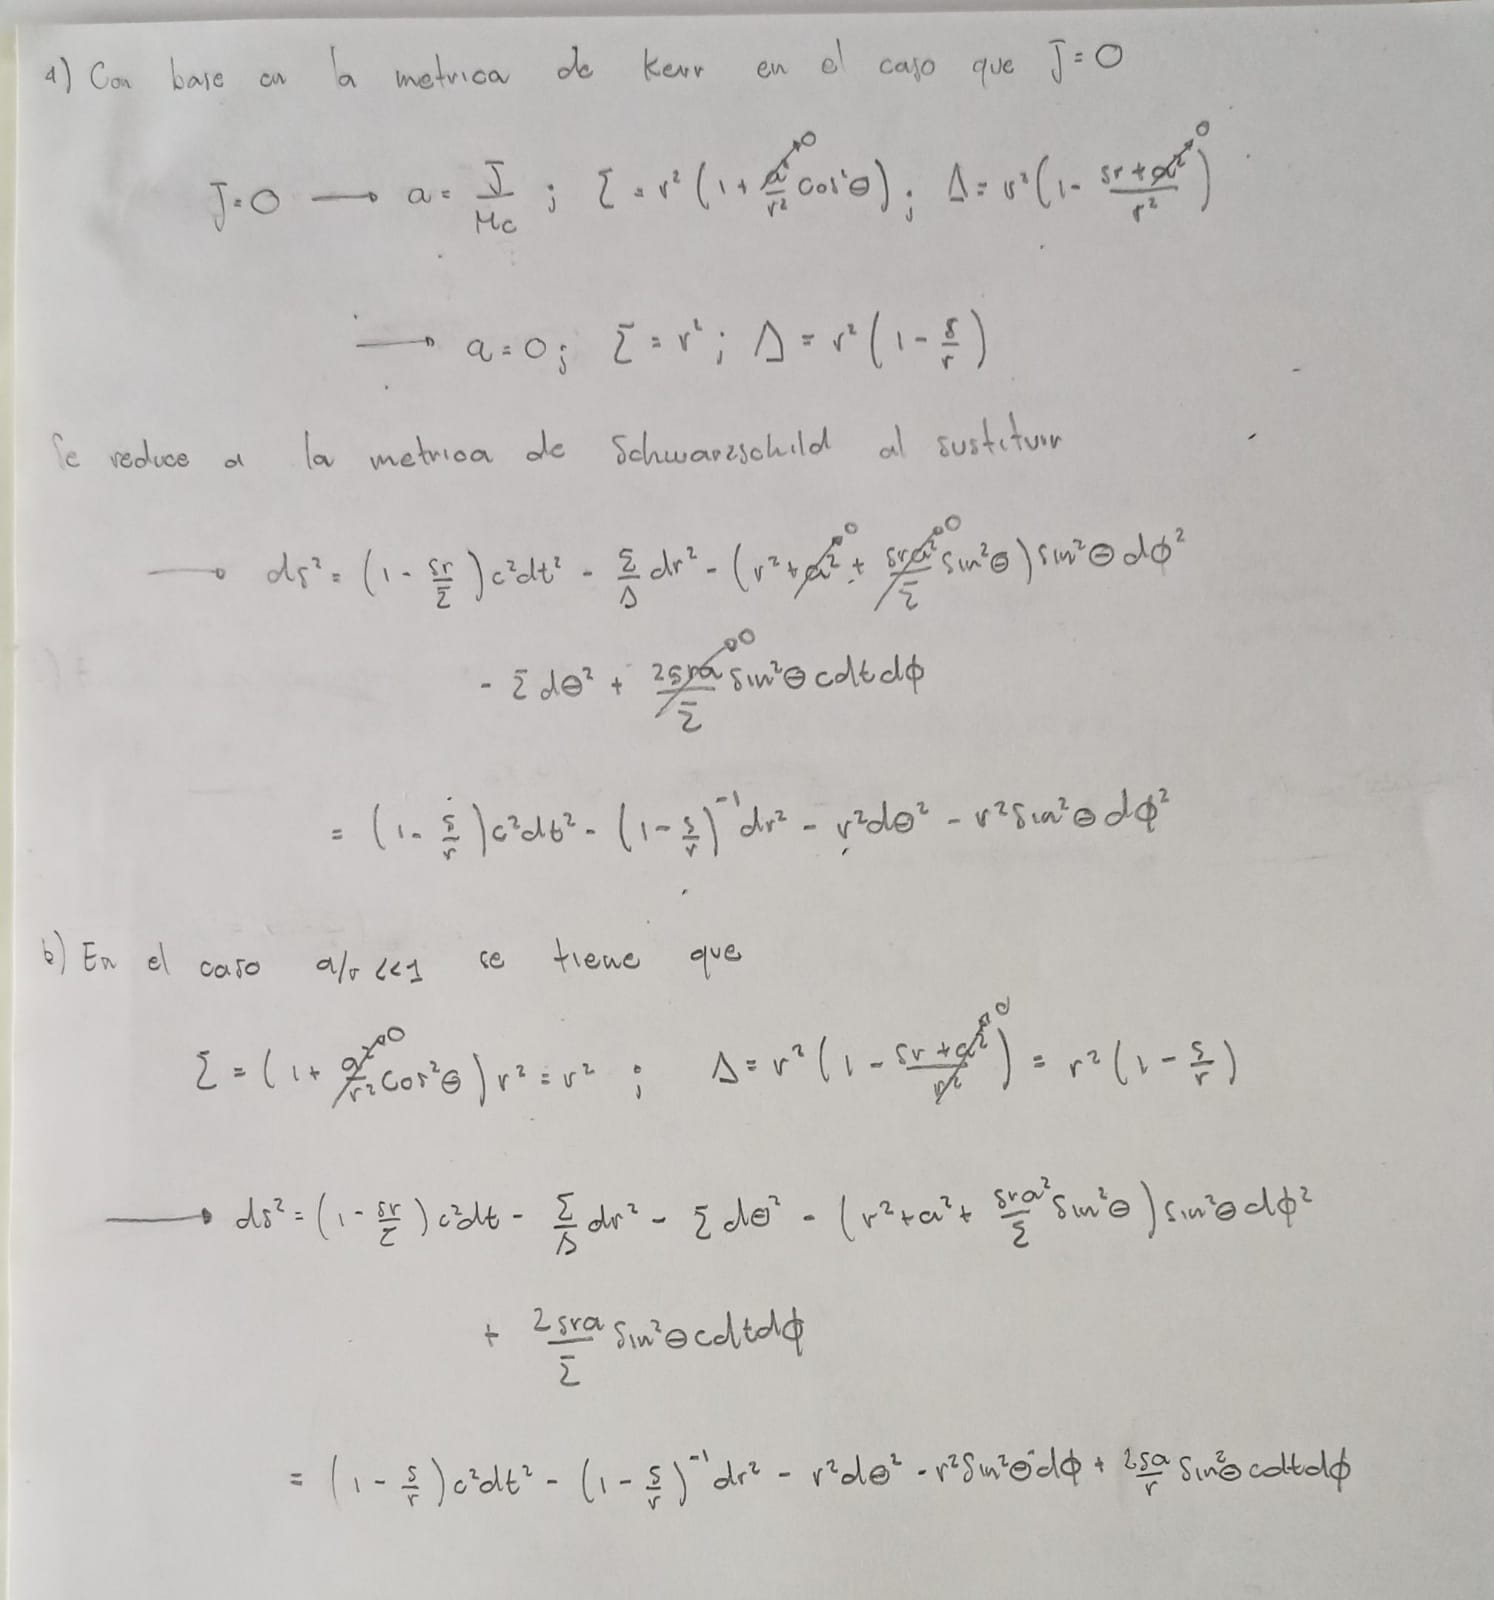

In [ ]:
# @markdown ##**Metric Tensor**

a = sp.Symbol('a')

# Diagonal Terms
g_metric = sp.diag(1-s/r, -1/(1-s/r), -r**2, -(r*sp.sin(theta))**2)

# Cross Term
g_metric[0,3] = g_metric[3,0] = -s*a/r*sp.sin(theta)**2

g_metric = ep.MetricTensor(g_metric.tolist(), (t, r, theta, phi))

sp.Eq(sp.Symbol(r'g_{\mu\nu}'), g_metric.tensor(), evaluate = False)

Eq(g_{\mu\nu}, [[1 - s/r, 0, 0, -a*s*sin(theta)**2/r], [0, -1/(1 - s/r), 0, 0], [0, 0, -r**2, 0], [-a*s*sin(theta)**2/r, 0, 0, -r**2*sin(theta)**2]])

In [ ]:
# @markdown ##**Ricci Tensor**
Ricci = ep.RicciTensor.from_metric(g_metric).tensor()

sp.Eq(sp.Symbol(r'R_{\mu\nu}'), Ricci, evaluate = False)

Eq(R_{\mu\nu}, [[a**2*s**2*(-6*r**2*sin(theta)**2 + 8*r**2 + 4*r*s*sin(theta)**2 - 8*r*s + 3*s**2*sin(theta)**2)/(4*r**4*(a**2*s**2*sin(theta)**2 + r**4 - r**3*s)), 0, 0, a**3*s**3*(6*r*sin(theta)**2 - 4*r + 3*s*sin(theta)**2)*sin(theta)**2/(4*r**4*(a**2*s**2*sin(theta)**2 + r**4 - r**3*s))], [0, a**2*s**2*(-6*a**2*r*s**2*sin(theta)**2 + 6*a**2*s**3*sin(theta)**2 - 22*r**5 + 36*r**4*s - 15*r**3*s**2)*sin(theta)**2/(4*r**2*(r - s)*(a**2*s**2*sin(theta)**2 + r**4 - r**3*s)**2), a**2*s**2*(6*a**2*s**2*sin(theta)**2 + 10*r**4 - 9*r**3*s)*sin(theta)*cos(theta)/(2*r*(a**2*s**2*sin(theta)**2 + r**4 - r**3*s)**2), 0], [0, a**2*s**2*(6*a**2*s**2*sin(theta)**2 + 10*r**4 - 9*r**3*s)*sin(theta)*cos(theta)/(2*r*(a**2*s**2*sin(theta)**2 + r**4 - r**3*s)**2), a**2*s**2*(6*a**2*r*s**2*sin(theta)**4 - 3*a**2*s**3*sin(theta)**4 + 8*r**5*sin(theta)**2 - 2*r**5 - 11*r**4*s*sin(theta)**2 + 2*r**4*s + 3*r**3*s**2*sin(theta)**2)/(2*r*(a**2*s**2*sin(theta)**2 + r**4 - r**3*s)**2), 0], [a**3*s**3*(6*r*sin(thet

In [ ]:
# @markdown ##**Einstein Tensor**
G_Einstein = ep.EinsteinTensor.from_metric(g_metric).tensor()

sp.Eq(sp.Symbol(r'G_{\mu\nu}'), G_Einstein, evaluate = False)

Eq(G_{\mu\nu}, [[-a**2*s**2*(0.5 - 0.5*s/r)*(-9*a**2*r*s**2*sin(theta)**4 + 4*a**2*r*s**2*sin(theta)**2 - 3*a**2*s**3*sin(theta)**4 + 3*r**5*sin(theta)**2 + 8*r**5 - 14*r**4*s*sin(theta)**2 - 8*r**4*s + 12*r**3*s**2*sin(theta)**2)/(2*r**3*(a**2*s**2*sin(theta)**2 + r**4 - r**3*s)**2) + a**2*s**2*(-6*r**2*sin(theta)**2 + 8*r**2 + 4*r*s*sin(theta)**2 - 8*r*s + 3*s**2*sin(theta)**2)/(4*r**4*(a**2*s**2*sin(theta)**2 + r**4 - r**3*s)), 0, 0, a**3*s**3*(6*r*sin(theta)**2 - 4*r + 3*s*sin(theta)**2)*sin(theta)**2/(4*r**4*(a**2*s**2*sin(theta)**2 + r**4 - r**3*s)) + 0.25*a**3*s**3*(-9*a**2*r*s**2*sin(theta)**4 + 4*a**2*r*s**2*sin(theta)**2 - 3*a**2*s**3*sin(theta)**4 + 3*r**5*sin(theta)**2 + 8*r**5 - 14*r**4*s*sin(theta)**2 - 8*r**4*s + 12*r**3*s**2*sin(theta)**2)*sin(theta)**2/(r**4*(a**2*s**2*sin(theta)**2 + r**4 - r**3*s)**2)], [0, a**2*s**2*(-6*a**2*r*s**2*sin(theta)**2 + 6*a**2*s**3*sin(theta)**2 - 22*r**5 + 36*r**4*s - 15*r**3*s**2)*sin(theta)**2/(4*r**2*(r - s)*(a**2*s**2*sin(theta)**2 +

In [ ]:
# @markdown ##**Approximation**
# @markdown $$(a/r)^2<<1$$

# @markdown **Nota:** Se aprecia que no hay terminos de orden lineal $a/r$ por tanto se toma $a\to0$

display(sp.Eq(sp.Symbol(r'R_{\mu\nu}'), Ricci.subs(a,0), evaluate = False),
        sp.Eq(sp.Symbol(r'G_{\mu\nu}'), G_Einstein.subs(a,0), evaluate = False))

Eq(R_{\mu\nu}, [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])

Eq(G_{\mu\nu}, [[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])